In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
from dishpylib.pyhelpers import make_outattr_metadata
from dishpylib.pyhelpers import print_runtime


In [3]:
print_runtime()


context: ci
hostname: pkrvm2jjpg2dj4m
interpreter: 3.10.12 (main, Aug 15 2025, 14:32:43) [GCC 11.4.0]
notebook name: bucket=prq49--a=all_stints_all_series_profiles+endeavor=16--x=complexity-robustness
notebook path: /home/runner/work/oee4/oee4/binder/bucket=prq49--a=all_stints_all_series_profiles+endeavor=16--x=complexity-robustness.ipynb
revision: bdac574
timestamp: 2025-08-30T00:35:53Z00:00

IPython==7.16.1
packaging==25.0


<ipython-input-3-4d790cf6450f>:1: DeprecatedWarning: print_runtime is deprecated. use nbmetalog package instead
  print_runtime()


# get data


In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/series-profiles/stage=8+what=elaborated/',
)


In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest


<ipython-input-5-747b1fe91af5>:1: DtypeWarning: Columns (2270,2277,2284,2285,2286,2287,2289,2290,2291,2292,2298,2299,2300,2301,2302,2308,2309,2310) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


'-1af9f0eb89153a8e'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')


In [7]:
dfm10 = df[ df['Stint'] % 10 == 0 ]


# how do fitness complexity and robustness relate?


<ipython-input-8-b97f8d064356>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


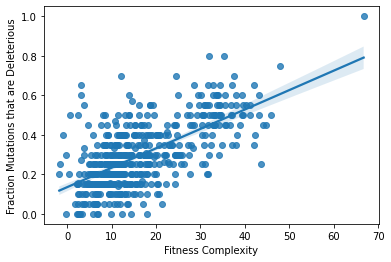

<AxesSubplot:xlabel='Fitness Complexity', ylabel='Fraction Mutations that are Deleterious'>

In [8]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-9-06786bb2eeec>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


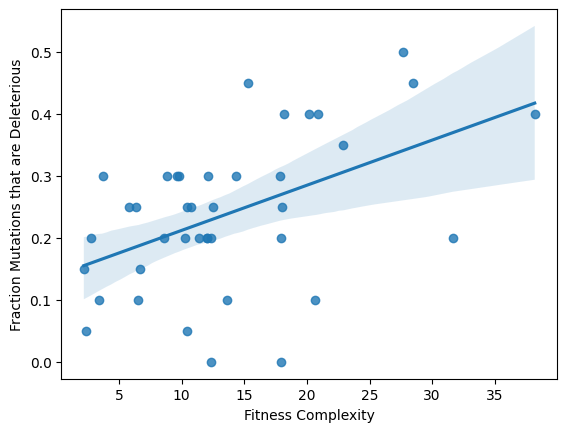

PearsonRResult(statistic=0.4821319000161407, pvalue=0.001630897748771551)

In [9]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Fitness Complexity',
        'Fraction Mutations that are Deleterious',
    ],
)
stats.pearsonr(
    fil['Fitness Complexity'],
    fil['Fraction Mutations that are Deleterious'],
)


<ipython-input-10-520c52715ab5>:14: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


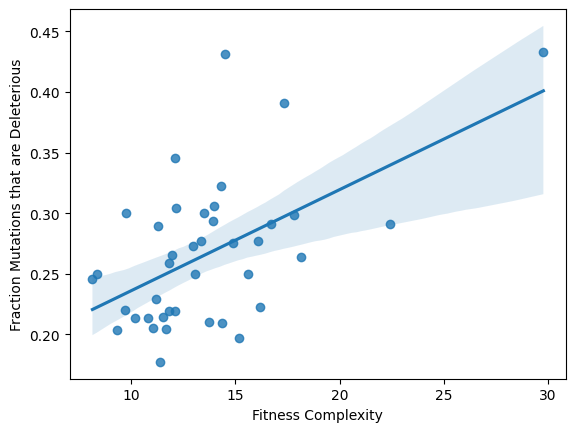

PearsonRResult(statistic=0.5459187806391943, pvalue=0.000268801647970235)

In [10]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
)


# how do phenotype complexity and robustness relate?


<ipython-input-11-ecc775d8cb6c>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


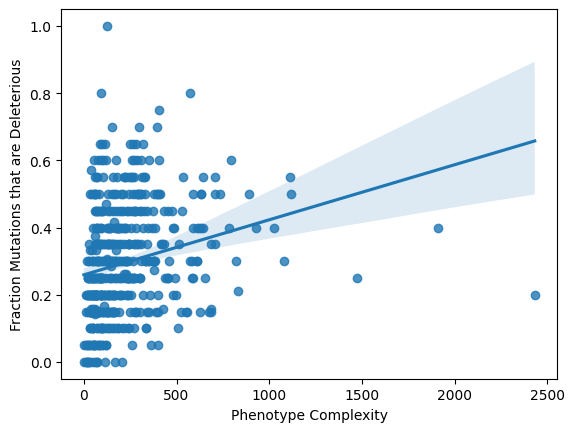

<AxesSubplot:xlabel='Phenotype Complexity', ylabel='Fraction Mutations that are Deleterious'>

In [11]:
tp.tee(
    sns.regplot,
    data=df,
    x='Phenotype Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-12-1fa5f93a0bba>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


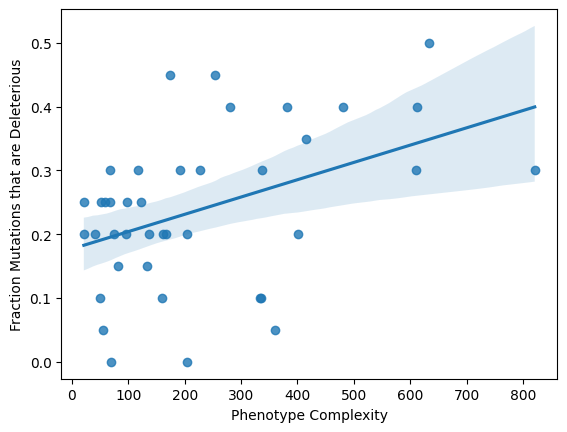

PearsonRResult(statistic=0.4278082278380377, pvalue=0.005893294232276053)

In [12]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Phenotype Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Phenotype Complexity',
        'Fraction Mutations that are Deleterious',
    ],
)
stats.pearsonr(
    fil['Phenotype Complexity'],
    fil['Fraction Mutations that are Deleterious'],
)


<ipython-input-13-b082bf52c51a>:14: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=phenotype-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


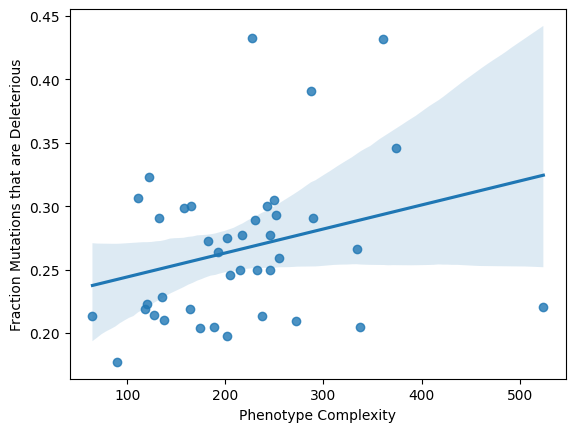

PearsonRResult(statistic=0.281746341566465, pvalue=0.0781890486289464)

In [13]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Phenotype Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
stats.pearsonr(
    df.groupby('Series')['Phenotype Complexity'].mean(),
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
)


# how do cardinal interface complexity and robustness relate?


<ipython-input-14-7a01076d6006>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


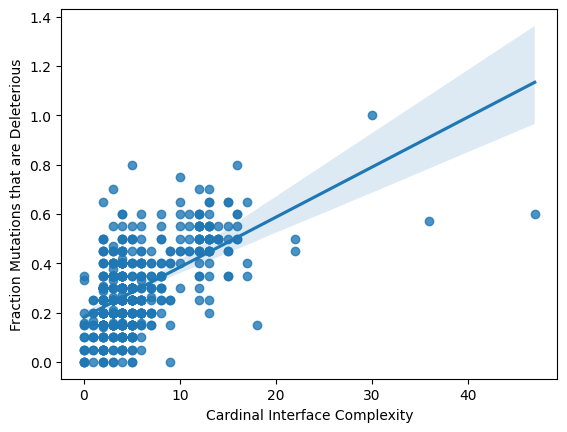

<AxesSubplot:xlabel='Cardinal Interface Complexity', ylabel='Fraction Mutations that are Deleterious'>

In [14]:
tp.tee(
    sns.regplot,
    data=df,
    x='Cardinal Interface Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-15-ec3776bb9e3a>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


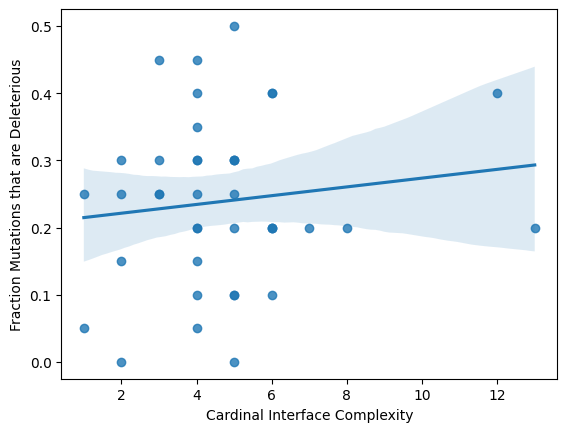

PearsonRResult(statistic=0.12654215648131667, pvalue=0.43652175485986533)

In [15]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Cardinal Interface Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Cardinal Interface Complexity',
        'Fraction Mutations that are Deleterious',
    ],
)
stats.pearsonr(
    fil['Cardinal Interface Complexity'],
    fil['Fraction Mutations that are Deleterious'],
)


<ipython-input-16-261e4804d78e>:14: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=cardinal-interface-complexity+y=fraction-mutations-that-are-deleterious+ext=.png


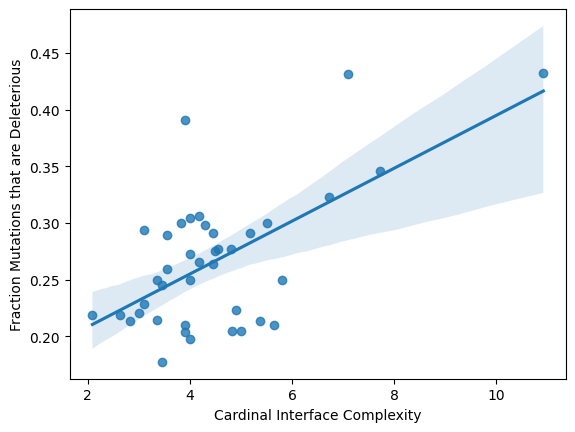

PearsonRResult(statistic=0.6157989138392634, pvalue=2.3410675312424827e-05)

In [16]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Cardinal Interface Complexity',
    y='Fraction Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
stats.pearsonr(
    df.groupby('Series')['Cardinal Interface Complexity'].mean(),
    df.groupby('Series')['Fraction Mutations that are Deleterious'].mean(),
)


# how do fitness complexity and mutating mutant fitness relate?


## mean


<ipython-input-17-705bbb3ce4d3>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.png


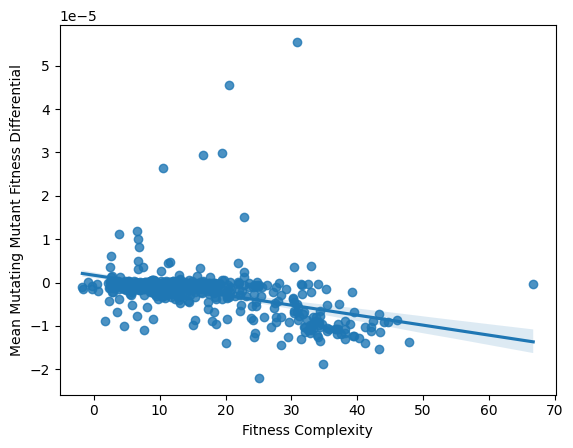

<AxesSubplot:xlabel='Fitness Complexity', ylabel='Mean Mutating Mutant Fitness Differential'>

In [17]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Mean Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-18-7893105a3352>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.png


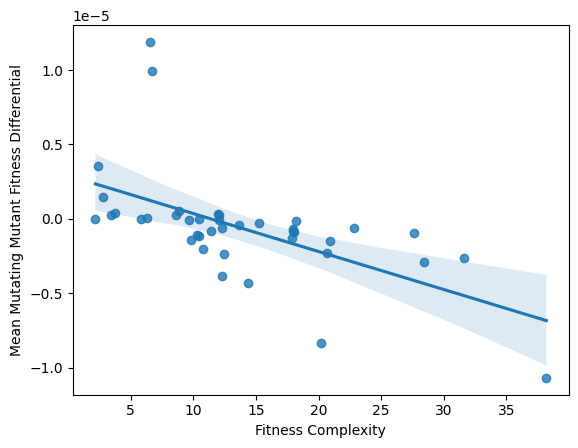

PearsonRResult(statistic=-0.5807851442792211, pvalue=8.526625023001578e-05)

In [18]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Mean Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Fitness Complexity',
        'Mean Mutating Mutant Fitness Differential',
    ],
)
stats.pearsonr(
    fil['Fitness Complexity'],
    fil['Mean Mutating Mutant Fitness Differential'],
)


<ipython-input-19-0e6f3d90e706>:14: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=mean-mutating-mutant-fitness-differential+ext=.png


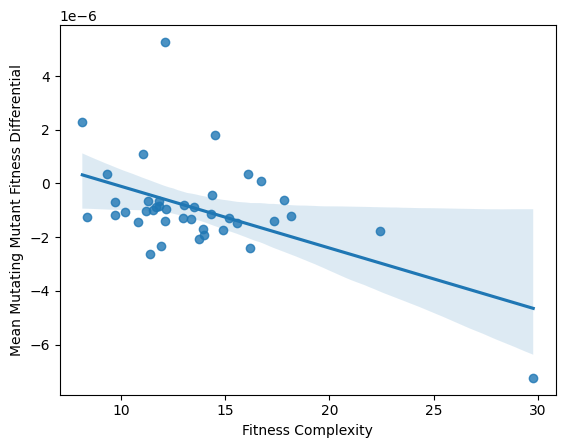

PearsonRResult(statistic=-0.5164447483919057, pvalue=0.000646066574928319)

In [19]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Mean Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Mean Mutating Mutant Fitness Differential'].mean(),
)


## median


<ipython-input-20-fcb5485ed07f>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.png


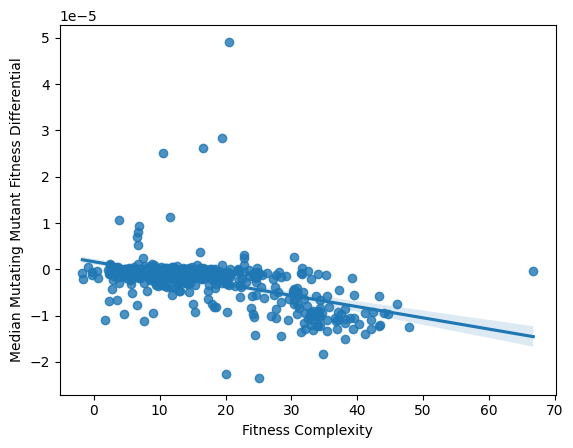

<AxesSubplot:xlabel='Fitness Complexity', ylabel='Median Mutating Mutant Fitness Differential'>

In [20]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Median Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-21-a474ab41c1d2>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.png


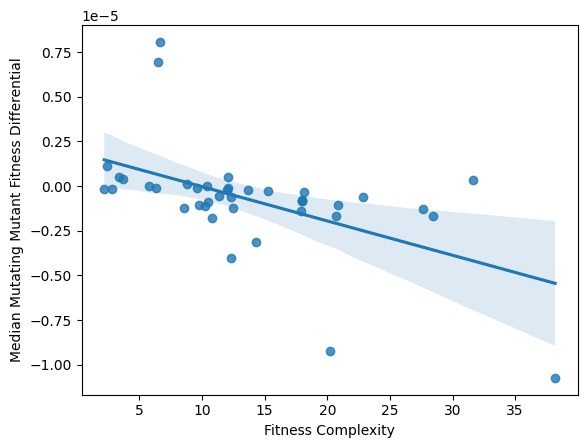

PearsonRResult(statistic=-0.5285507238124557, pvalue=0.00045503911777798167)

In [21]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Median Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Fitness Complexity',
        'Median Mutating Mutant Fitness Differential',
    ],
)
stats.pearsonr(
    fil['Fitness Complexity'],
    fil['Median Mutating Mutant Fitness Differential'],
)


<ipython-input-22-b99004724c70>:14: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=median-mutating-mutant-fitness-differential+ext=.png


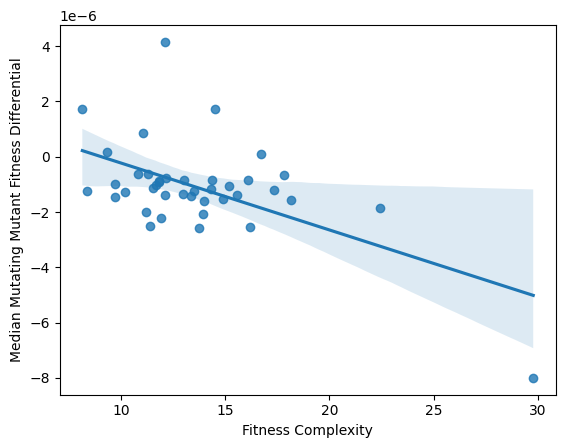

PearsonRResult(statistic=-0.5629552045596852, pvalue=0.00015585620567964222)

In [22]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Median Mutating Mutant Fitness Differential',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Median Mutating Mutant Fitness Differential'].mean(),
)


## fraction deleterious


<ipython-input-23-e1c53565c0ff>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.png


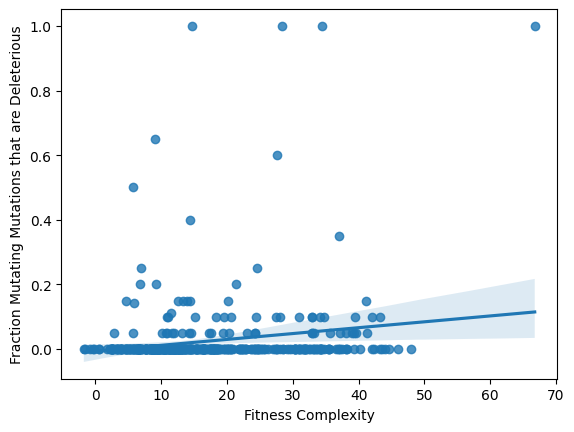

<AxesSubplot:xlabel='Fitness Complexity', ylabel='Fraction Mutating Mutations that are Deleterious'>

In [23]:
tp.tee(
    sns.regplot,
    data=df,
    x='Fitness Complexity',
    y='Fraction Mutating Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'identity',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-24-fcd9ece8dd88>:13: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.png


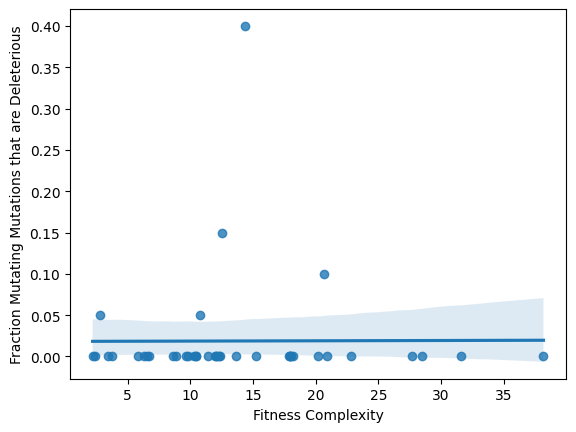

PearsonRResult(statistic=0.00431205886662394, pvalue=0.9789325864508762)

In [24]:
tp.tee(
    sns.regplot,
    data=df40,
    x='Fitness Complexity',
    y='Fraction Mutating Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-40',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)

fil = df40.dropna(
    subset=[
        'Fitness Complexity',
        'Fraction Mutating Mutations that are Deleterious',
    ],
)
stats.pearsonr(
    fil['Fitness Complexity'],
    fil['Fraction Mutating Mutations that are Deleterious'],
)


<ipython-input-25-46f50686e912>:14: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=fitness-complexity+y=fraction-mutating-mutations-that-are-deleterious+ext=.png


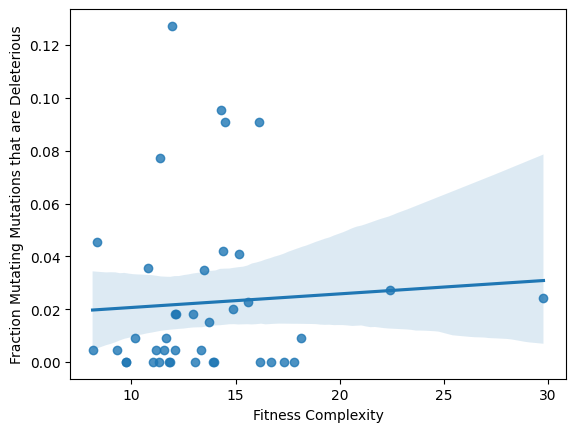

PearsonRResult(statistic=0.06349653430516446, pvalue=0.6970940121905652)

In [25]:
groupby_Series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_Series_mean_df,
    x='Fitness Complexity',
    y='Fraction Mutating Mutations that are Deleterious',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'groupby-Series-mean',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
stats.pearsonr(
    df.groupby('Series')['Fitness Complexity'].mean(),
    df.groupby('Series')['Fraction Mutating Mutations that are Deleterious'].mean(),
)
